In [1]:
import os
import csv
import docx2txt
import fitz 
import pandas as pd
import matplotlib as plt


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def read_docx(file_path):
    text = docx2txt.process(file_path)
    return text
    with Exception as e :
        print(f"Error processing {file_path} : {e}")
        return ""

In [3]:
def read_pdf(file_path):
    text = ""
    with fitz.open(file_path) as pdf:
        for page in pdf:
            text += page.get_text("text")
    return text

In [4]:
def process_resumes_to_csv(folder_path, output_csv):
    with open(output_csv, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["File Name", "Category", "Content"])  
        for root, dirs, files in os.walk(folder_path):
            folder_name = os.path.basename(root)  
            for file in files:
                file_path = os.path.join(root, file)
                resume_text = ""
                try:
                    if file.endswith(".docx"):
                        resume_text = read_docx(file_path)
                    elif file.endswith(".pdf"):
                        resume_text = read_pdf(file_path)
                    else:
                        print(f"Skipped unsupported file format: {file}")
                        continue
                    writer.writerow([file, folder_name, resume_text])
                    print(f"Processed: {file} in folder: {folder_name}")

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
                    
folder_path = r'C:\Users\HP\Documents\DataScienceCourse\Resume Classification Project\Resumes_Docx'
output_csv = 'files_to_csv_resumes1.csv'
process_resumes_to_csv(folder_path, output_csv)

Processed: Peoplesoft Admin_AnubhavSingh.docx in folder: Peoplesoft Resume
Skipped unsupported file format: Peoplesoft Admin_G Ananda Rayudu.doc
Processed: Peoplesoft Admin_G Ananda Rayudu.docx in folder: Peoplesoft Resume
Skipped unsupported file format: Peoplesoft Admin_Gangareddy.doc
Processed: Peoplesoft Admin_Gangareddy.docx in folder: Peoplesoft Resume
Processed: Peoplesoft Admin_Murali.docx in folder: Peoplesoft Resume
Skipped unsupported file format: Peoplesoft Admin_Priyanka Ramadoss.doc
Processed: Peoplesoft Admin_Priyanka Ramadoss.docx in folder: Peoplesoft Resume
Processed: Peoplesoft Admin_SirazuddinMohammad.docx in folder: Peoplesoft Resume
Skipped unsupported file format: Peoplesoft Admin_srinivasarao.doc
Processed: Peoplesoft Admin_srinivasarao.docx in folder: Peoplesoft Resume
Processed: Peoplesoft Admin_Varkala Vikas.docx in folder: Peoplesoft Resume
Skipped unsupported file format: Peoplesoft Admin_Vinod Akkala.doc
Processed: Peoplesoft Admin_Vinod Akkala.docx in fol

Processed: AradhanaTripathi[4_0].docx in folder: SQL Developer
Processed: Buddha Vamsi.docx in folder: SQL Developer
Processed: kamballapradeep.docx in folder: SQL Developer
Skipped unsupported file format: Nazeer Basha.doc
Processed: Nazeer Basha.docx in folder: SQL Developer
Processed: Neeraj Mishra.docx in folder: SQL Developer
Processed: premsai.docx in folder: SQL Developer
Skipped unsupported file format: Priyanka L.doc
Processed: Priyanka L.docx in folder: SQL Developer
Processed: PSyamKumar[2_3].docx in folder: SQL Developer
Processed: Rajupavanakumari[2_10].docx in folder: SQL Developer
Processed: Ramalakshmi K.docx in folder: SQL Developer
Processed: RameshNataru[3_4].docx in folder: SQL Developer
Skipped unsupported file format: Tatikonda Kiran Kumar.doc
Processed: Tatikonda Kiran Kumar.docx in folder: SQL Developer
Processed: Vinod B.docx in folder: SQL Developer
Error reading C:\Users\HP\Documents\DataScienceCourse\Resume Classification Project\Resumes_Docx\SQL Developer\~

## EDA

In [44]:
import pandas as pd
data = pd.read_csv("files_to_csv_resumes1.csv")
data

,File Name,Category,Content
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft Resume,G. Ananda Rayudu \n\n\t\t https://www.li...
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft Resume,PeopleSoft Database Administrator\n\n ...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Classification: Internal\n\nClassification: In...
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft Resume,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...,...
74,Sri Krishna S_Hexaware.docx,workday,Workday Integration Consultant\n\n\n\nName ...
75,Srikanth-Hexaware.docx,workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,SSKumar_Hexaware.docx,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,Venkateswarlu B_Hexaware.docx,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [45]:
data.head(80)

,File Name,Category,Content
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft Resume,G. Ananda Rayudu \n\n\t\t https://www.li...
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft Resume,PeopleSoft Database Administrator\n\n ...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Classification: Internal\n\nClassification: In...
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft Resume,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...,...
74,Sri Krishna S_Hexaware.docx,workday,Workday Integration Consultant\n\n\n\nName ...
75,Srikanth-Hexaware.docx,workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,SSKumar_Hexaware.docx,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,Venkateswarlu B_Hexaware.docx,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


### EDA

In [46]:
data.shape

(79, 3)

In [47]:
data.duplicated().sum()

0

In [48]:
data.isna().sum()

File Name    0
Category     0
Content      0
dtype: int64

In [49]:
data.describe()

,File Name,Category,Content
count,79,79,79
unique,79,4,79
top,Peoplesoft Admin_AnubhavSingh.docx,React Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
freq,1,24,1


In [50]:
data

,File Name,Category,Content
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft Resume,G. Ananda Rayudu \n\n\t\t https://www.li...
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft Resume,PeopleSoft Database Administrator\n\n ...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Classification: Internal\n\nClassification: In...
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft Resume,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...,...
74,Sri Krishna S_Hexaware.docx,workday,Workday Integration Consultant\n\n\n\nName ...
75,Srikanth-Hexaware.docx,workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,SSKumar_Hexaware.docx,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,Venkateswarlu B_Hexaware.docx,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


##### Bar Chart

In [51]:
folder_file_count = data.groupby('Category')['File Name'].count()

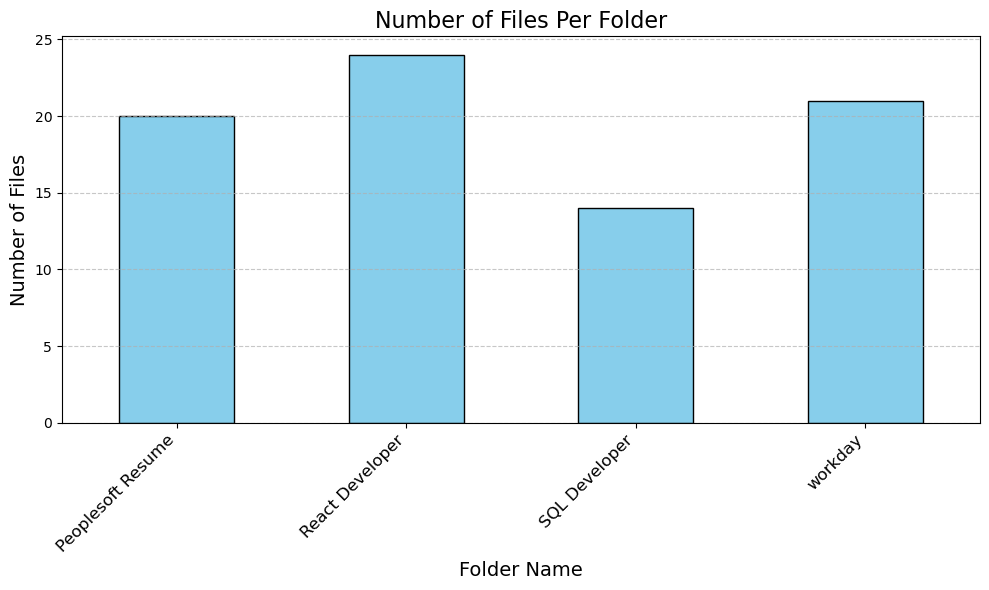

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
folder_file_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Files Per Folder', fontsize=16)
plt.xlabel('Folder Name', fontsize=14)
plt.ylabel('Number of Files', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Histogram

In [53]:
data['data_length'] = data['Content'].str.len()

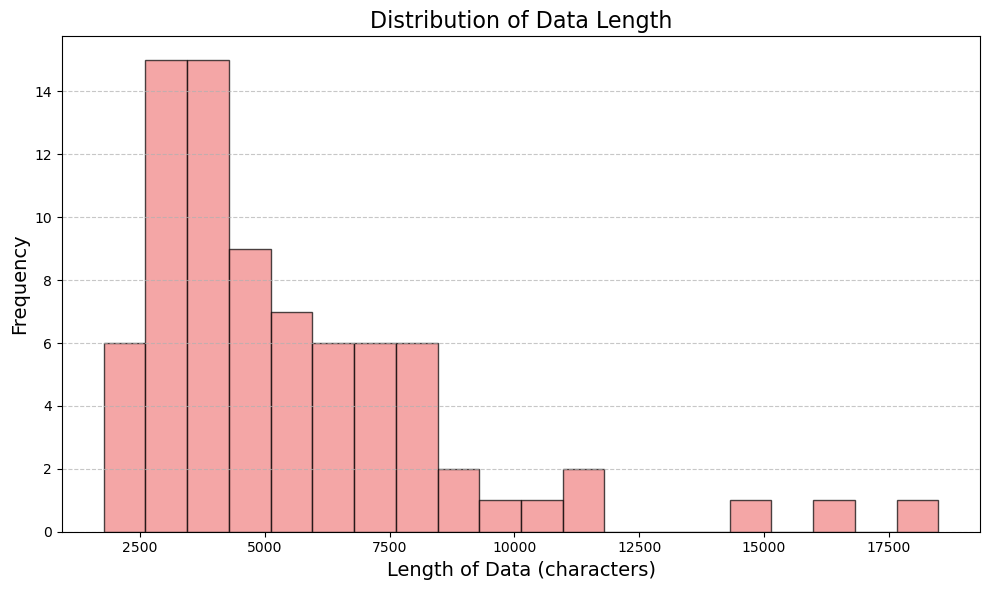

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(data['data_length'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)

plt.title('Distribution of Data Length', fontsize=16)
plt.xlabel('Length of Data (characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Pie Chart

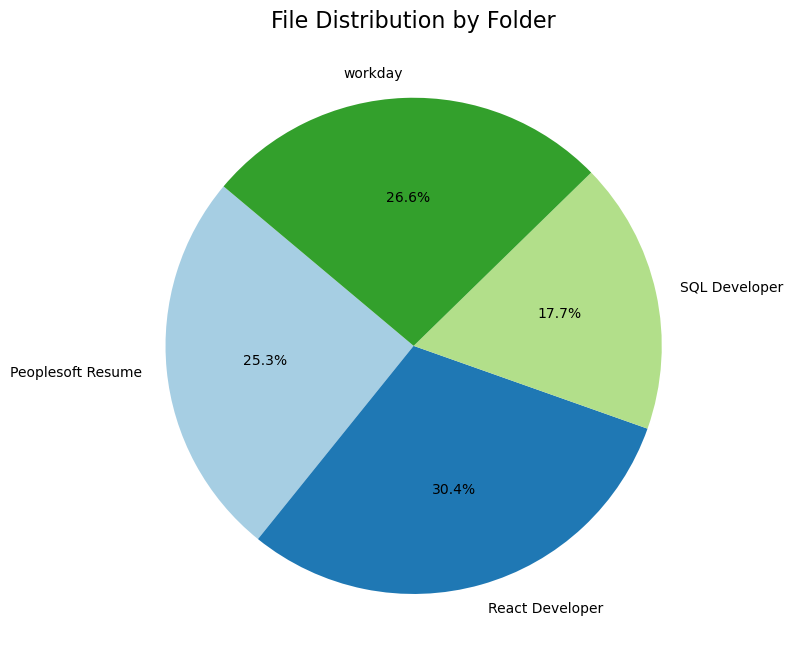

In [55]:
plt.figure(figsize=(8, 8))
folder_file_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('File Distribution by Folder', fontsize=16)

plt.ylabel('')  
plt.tight_layout()
plt.show()

##### Word Cloud

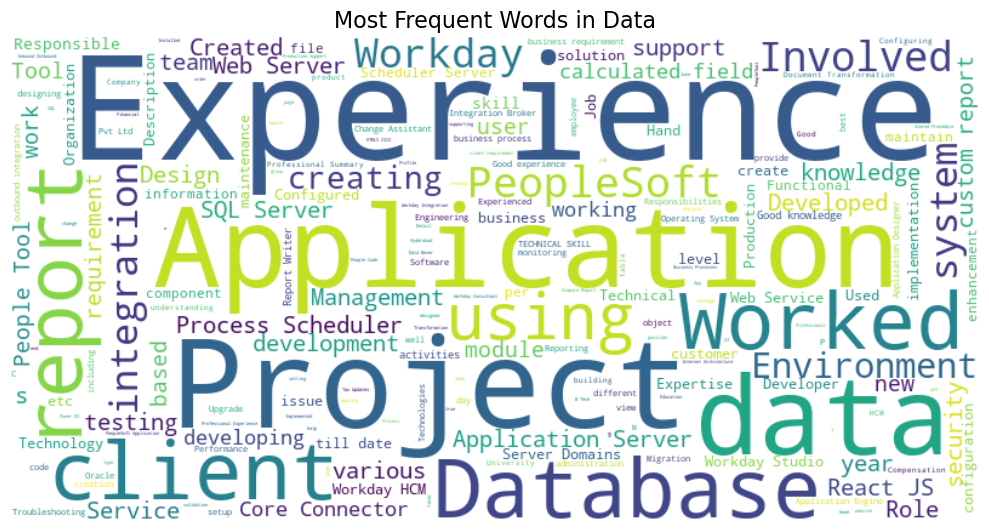

In [56]:
from wordcloud import WordCloud

text_data = ' '.join(data['Content'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Most Frequent Words in Data', fontsize=16)
plt.tight_layout()
plt.show()

In [57]:
data

,File Name,Category,Content,data_length
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft Resume,G. Ananda Rayudu \n\n\t\t https://www.li...,8318
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft Resume,PeopleSoft Database Administrator\n\n ...,6900
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Classification: Internal\n\nClassification: In...,4917
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft Resume,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196
...,...,...,...,...
74,Sri Krishna S_Hexaware.docx,workday,Workday Integration Consultant\n\n\n\nName ...,7030
75,Srikanth-Hexaware.docx,workday,Srikanth (WORKDAY hCM Consultant)\t ...,6737
76,SSKumar_Hexaware.docx,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,8329
77,Venkateswarlu B_Hexaware.docx,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,6836


In [58]:
data.drop(['data_length'], axis = 1, inplace = True)

Data Cleaning

In [59]:
def preprocess(text):
    return text.lower()
data['Resume_Details'] = data.Content.apply(lambda x: preprocess(x))

In [60]:
import nltk
from nltk.corpus import stopwords


In [61]:
import re
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text
    

In [62]:
data['Resume_Details'] = data['Resume_Details'].apply(lambda x:clean(x))

In [63]:
data

,File Name,Category,Content,Resume_Details
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft Resume,G. Ananda Rayudu \n\n\t\t https://www.li...,g ananda rayudu profile summary 7 years experi...
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft Resume,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator gangareddy p...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft Resume,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss 6146 mountpleasant coonoor n...
...,...,...,...,...
74,Sri Krishna S_Hexaware.docx,workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant name sri krishn...
75,Srikanth-Hexaware.docx,workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
76,SSKumar_Hexaware.docx,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar ss role workday con...
77,Venkateswarlu B_Hexaware.docx,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlub workday consultant professional...


In [64]:
data.drop(['Content'], axis = 1, inplace = True)
data

,File Name,Category,Resume_Details
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,anubhav kumar singh core competencies scriptin...
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft Resume,g ananda rayudu profile summary 7 years experi...
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft Resume,peoplesoft database administrator gangareddy p...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,classification internal classification interna...
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft Resume,priyanka ramadoss 6146 mountpleasant coonoor n...
...,...,...,...
74,Sri Krishna S_Hexaware.docx,workday,workday integration consultant name sri krishn...
75,Srikanth-Hexaware.docx,workday,srikanth workday hcm consultant seeking suitab...
76,SSKumar_Hexaware.docx,workday,workday hcm fcm name kumar ss role workday con...
77,Venkateswarlu B_Hexaware.docx,workday,venkateswarlub workday consultant professional...


In [65]:
data.Category.unique()

array(['Peoplesoft Resume', 'React Developer', 'SQL Developer', 'workday'],
      dtype=object)

In [66]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [67]:
le = LabelEncoder()
le.fit(data[['Category']])
data['Category'] = le.transform(data['Category'])
data['Category'] += 1

In [68]:
data['Category'].unique()

array([1, 2, 3, 4])

In [69]:
data.head(40)


,File Name,Category,Resume_Details
0,Peoplesoft Admin_AnubhavSingh.docx,1,anubhav kumar singh core competencies scriptin...
1,Peoplesoft Admin_G Ananda Rayudu.docx,1,g ananda rayudu profile summary 7 years experi...
2,Peoplesoft Admin_Gangareddy.docx,1,peoplesoft database administrator gangareddy p...
3,Peoplesoft Admin_Murali.docx,1,classification internal classification interna...
4,Peoplesoft Admin_Priyanka Ramadoss.docx,1,priyanka ramadoss 6146 mountpleasant coonoor n...
5,Peoplesoft Admin_SirazuddinMohammad.docx,1,sirazuddin bangalore india sirazuddin bangalor...
6,Peoplesoft Admin_srinivasarao.docx,1,peoplesoft administrator srinivask experience ...
7,Peoplesoft Admin_Varkala Vikas.docx,1,peoplesoft admin varkala vikas career objectiv...
8,Peoplesoft Admin_Vinod Akkala.docx,1,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft DBA_Ganesh Alladi.docx,1,peoplesoft adminpeoplesoft dba ganesh alladi c...


In [70]:
tfidf = TfidfVectorizer()
tfidf.fit(data['Resume_Details'])
resume = tfidf.transform(data['Resume_Details'])

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [72]:
X_train , X_test, y_train , y_test = train_test_split(resume, data['Category'], test_size = 0.25, random_state = 42)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [74]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

In [75]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 1.0
Accuarcy of LogisticRegression on test data: 0.95
Accuarcy of RandomForestClassifier on test data: 1.0
Accuarcy of SVC on test data: 0.95
Accuarcy of MultinomialNB on test data: 0.95


In [76]:
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
    # Evaluate using cross-validation
    cv_scores = cross_val_score(model, resume, data['Category'], cv=5)
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f}\n")
    print("=" * 50)

Training and evaluating KNeighborsClassifier...
KNeighborsClassifier Test Accuracy: 1.0
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Cross-validation accuracy: 0.9875

Training and evaluating LogisticRegression...
LogisticRegression Test Accuracy: 0.95
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5


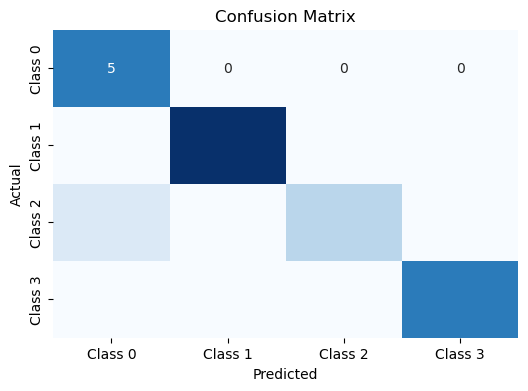

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Single-Label Classification
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  # Update as needed
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Update as needed

plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


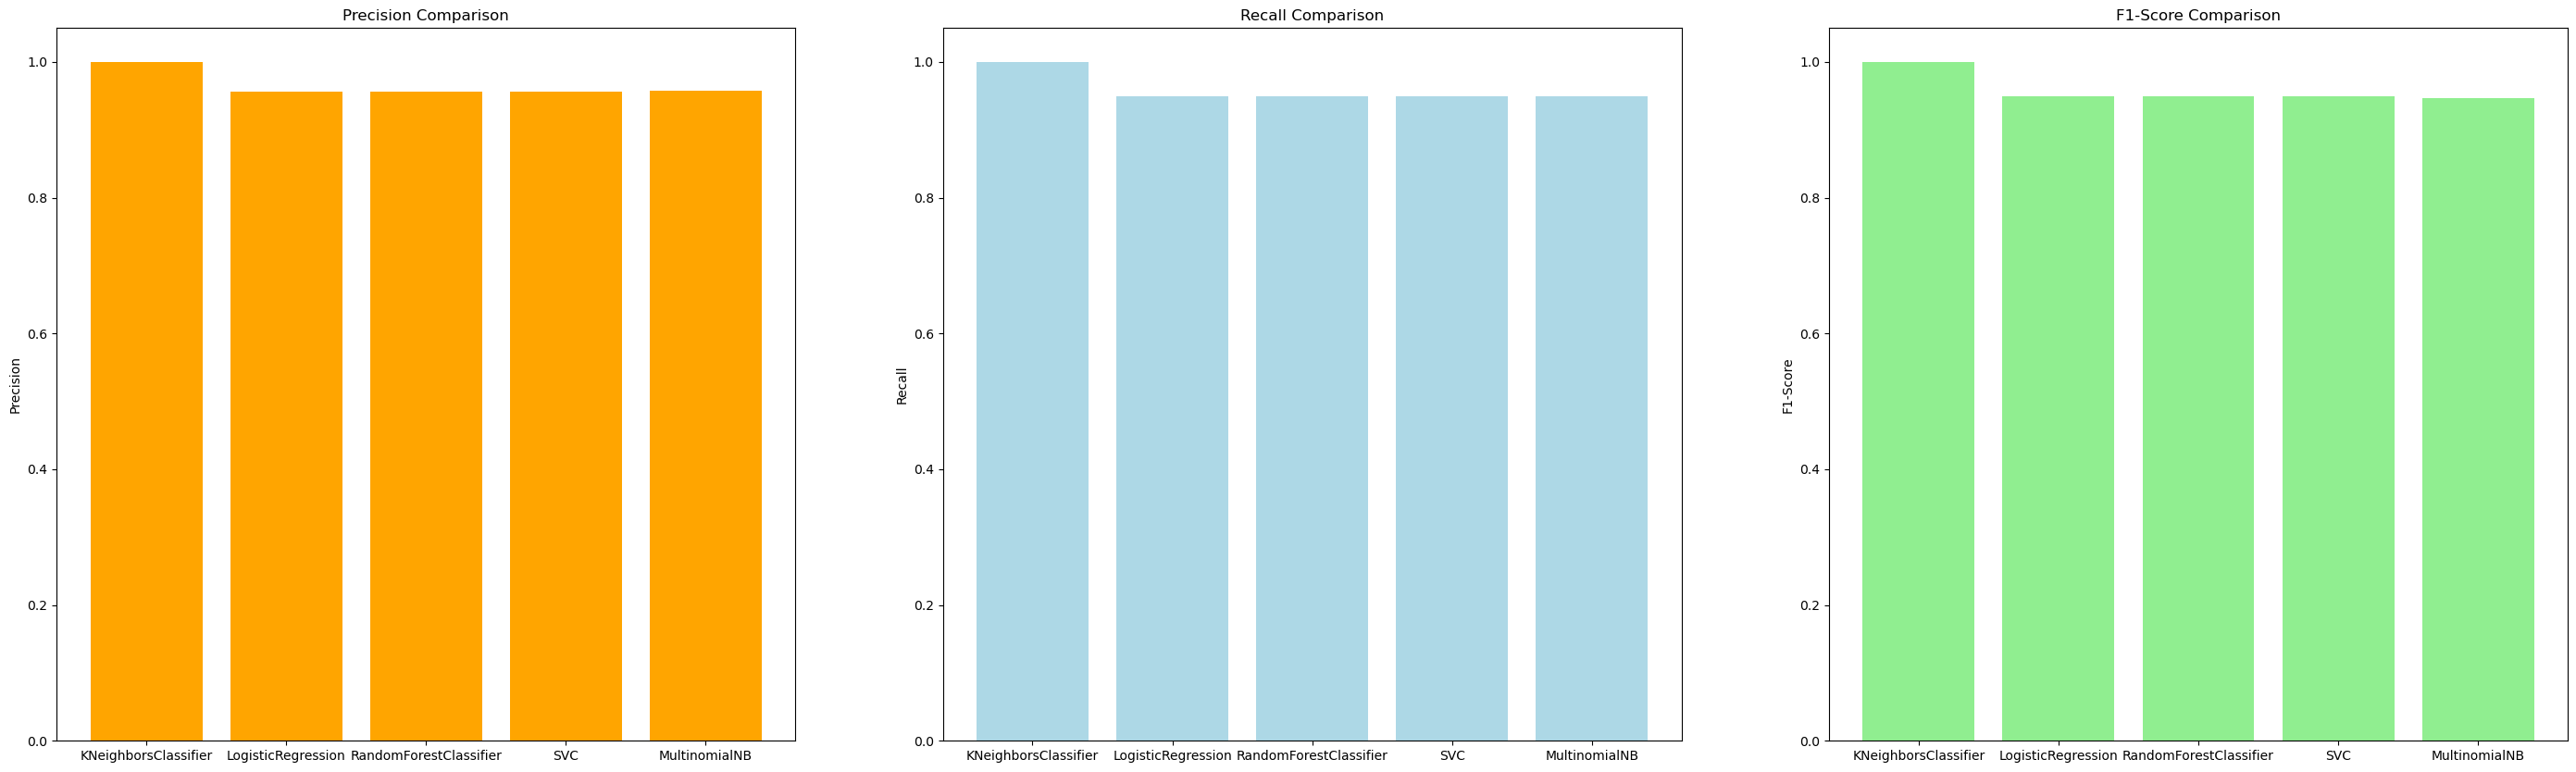

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision, recall, and f1-score for each model
metrics = ['Precision', 'Recall', 'F1-Score']
model_metrics = {metric: {} for metric in metrics}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_metrics['Precision'][model_name] = precision_score(y_test, y_pred, average='weighted')
    model_metrics['Recall'][model_name] = recall_score(y_test, y_pred, average='weighted')
    model_metrics['F1-Score'][model_name] = f1_score(y_test, y_pred, average='weighted')

# Plotting precision, recall, and f1-score comparison
fig, axes = plt.subplots(1, 3, figsize=(35, 10))

# Precision
axes[0].bar(model_metrics['Precision'].keys(), model_metrics['Precision'].values(), color='orange')
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision')

# Recall
axes[1].bar(model_metrics['Recall'].keys(), model_metrics['Recall'].values(), color='lightblue')
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall')

# F1-Score
axes[2].bar(model_metrics['F1-Score'].keys(), model_metrics['F1-Score'].values(), color='lightgreen')
axes[2].set_title('F1-Score Comparison')
axes[2].set_ylabel('F1-Score')

plt.show()


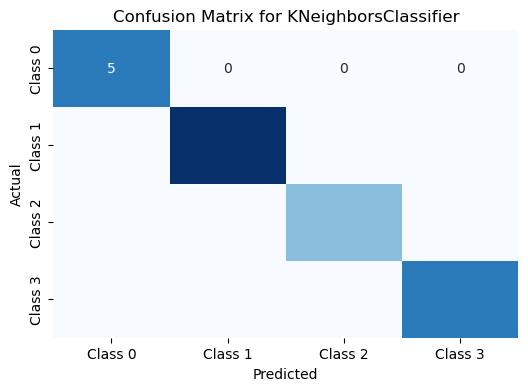

In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_name = 'KNeighborsClassifier'
model = models[model_name]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix for KNeighborsClassifier
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],  
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  

plt.title(f"Confusion Matrix for {model_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


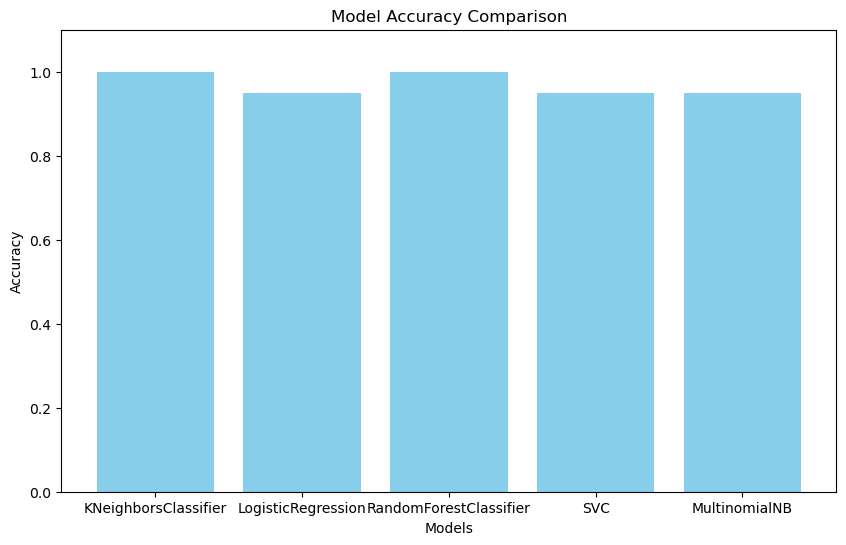

In [80]:
import matplotlib.pyplot as plt

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # Limiting the y-axis to 1.0
plt.show()


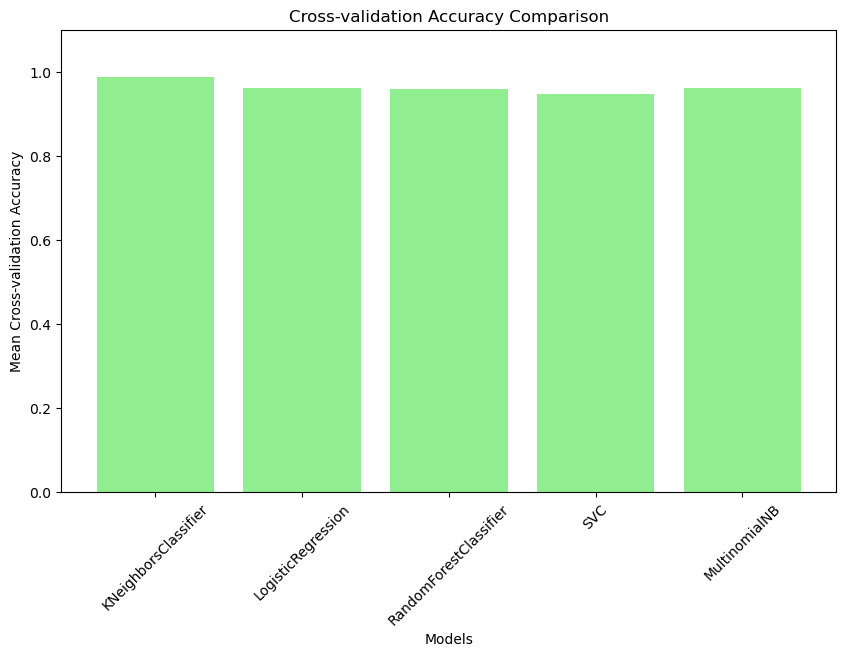

In [81]:
# Dictionary to store cross-validation scores for each model
cv_scores_dict = {}

# Iterate through each model to calculate cross-validation scores
for model_name, model in models.items():
    cv_scores = cross_val_score(model, resume, data['Category'], cv=5)
    cv_scores_dict[model_name] = cv_scores.mean()  

# Plotting the cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.bar(cv_scores_dict.keys(), cv_scores_dict.values(), color='lightgreen')
plt.title('Cross-validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Cross-validation Accuracy')
plt.ylim(0, 1.1)  
plt.xticks(rotation=45)  #
plt.show()


In [91]:
# Apply preprocessing and cleaning functions to each resume in the 'Resume_Details' column
data['Cleaned_Resumes'] = data['Resume_Details'].apply(lambda x: clean(preprocess(x)))

# Define the category map
category_map = {
    1: "Peoplesoft Resume",
    2: "React Developer",
    3: "SQL Developer",
    4: "Workday",
}

# Function to predict category for each cleaned resume
def predict_category(resume):
    input_features = tfidf.transform([resume])  # Transform cleaned resume using TF-IDF
    prediction_id = model.predict(input_features)[0]  # Predict the category
    return category_map.get(prediction_id, "Unknown")  # Map prediction ID to category name

# Apply the prediction function to each cleaned resume and store the results in a new column
data['Predicted_Category'] = data['Cleaned_Resumes'].apply(predict_category)

# Print the results for a quick check
print(data[['Resume_Details', 'Cleaned_Resumes', 'Predicted_Category']])


                                       Resume_Details  \
0   anubhav kumar singh core competencies scriptin...   
1   g ananda rayudu profile summary 7 years experi...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss 6146 mountpleasant coonoor n...   
..                                                ...   
74  workday integration consultant name sri krishn...   
75  srikanth workday hcm consultant seeking suitab...   
76  workday hcm fcm name kumar ss role workday con...   
77  venkateswarlub workday consultant professional...   
78  vinay kumar v workday functional consultant ex...   

                                      Cleaned_Resumes Predicted_Category  
0   anubhav kumar singh core competencies scriptin...  Peoplesoft Resume  
1   g ananda rayudu profile summary 7 years experi...  Peoplesoft Resume  
2   peoplesoft database administrator gangareddy p...  Peoplesoft Resume  
3   classificat

In [92]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))